In [1]:
import sys
import os
sys.path.append('..')

from PIL import ImageFont

from comic_ocr.typing import Size, Line
from comic_ocr.utils.files import load_images_with_annotation, get_path_project_dir
from comic_ocr.utils.ploting import show_image, show_images
from comic_ocr.utils.nb_annotation import lines_from_nb_annotation_data, lines_to_nb_annotation_data, write_annotation_data_for_image
from comic_ocr.utils import image_with_annotations
from comic_ocr import localize_lines

In [2]:
image_files = get_path_project_dir('data/manga_line_annotated/*.jpg')

images, image_files, annotations = load_images_with_annotation(image_files)
print(len(images))

no_annotation_images = []
no_annotation_image_files = []

for i in range(len(images)):
    if annotations[i]:
        lines = lines_from_nb_annotation_data(annotations[i])
        if lines:
            print('Skipping', image_files[i])
            continue
        
    print('Adding', image_files[i])
    no_annotation_images.append(images[i])
    no_annotation_image_files.append(image_files[i])
    

print(len(no_annotation_images))

6
Skipping /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_01.jpg
Adding /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_02.jpg
Adding /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_03.jpg
Adding /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_04.jpg
Adding /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_05.jpg
Adding /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_06.jpg
5


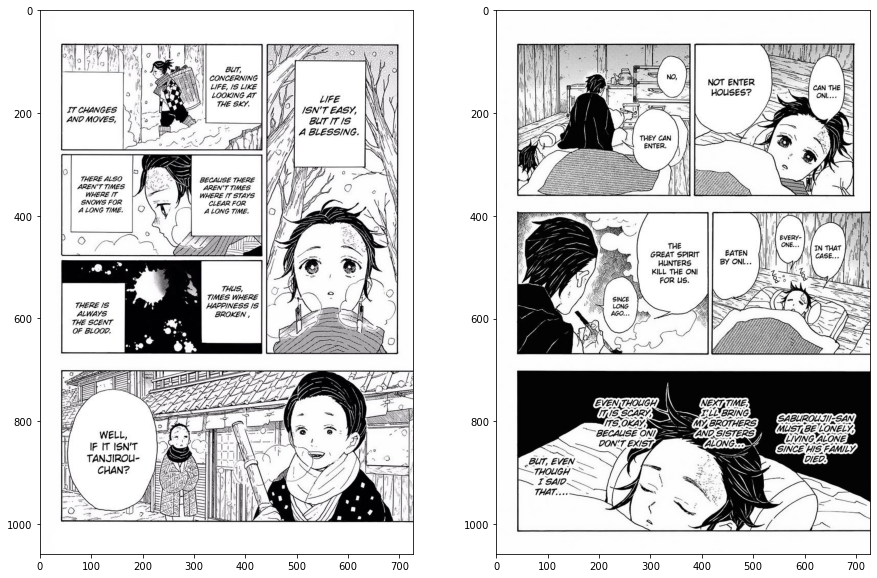

In [3]:
show_images(no_annotation_images[:2])

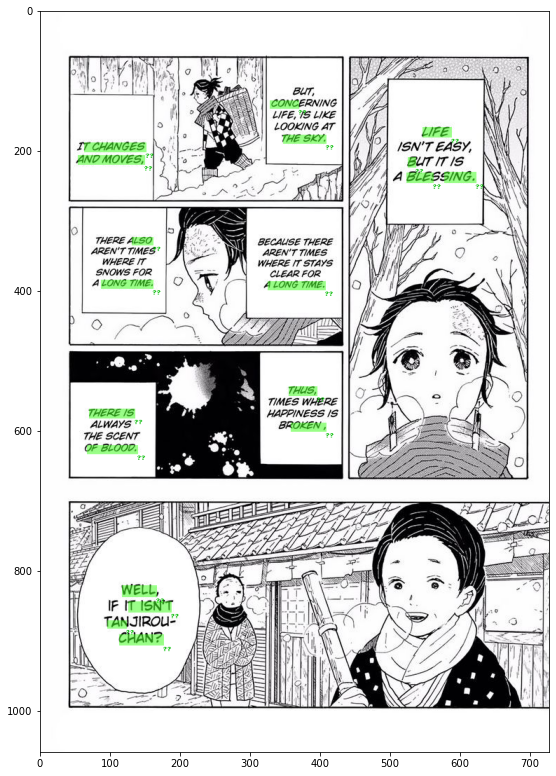

In [4]:
def create_line_annotations(image, text='??'):
    line_locations = localize_lines(image)
    lines = [Line.of(text='??', at=l) for l in line_locations]
    return lines

def show_image_with_line_annotations(image):
    lines = create_line_annotations(image)
    show_image(image_with_annotations(image, lines), figsize=(20, 30))

show_image_with_line_annotations(no_annotation_images[0])

In [5]:
for i in range(len(no_annotation_images)):
    image, image_file = no_annotation_images[i], no_annotation_image_files[i]
    lines = create_line_annotations(image)
    
    print(f'Writing {len(lines)} line annotations to {image_file}')
    write_annotation_data_for_image(image_file, lines_to_nb_annotation_data(lines))


Writing 19 line annotations to /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_02.jpg
Writing 22 line annotations to /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_03.jpg
Writing 10 line annotations to /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_04.jpg
Writing 7 line annotations to /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_05.jpg
Writing 3 line annotations to /Users/wanasit/Dropbox/Workspace_Personal/manga-ocr/data/manga_line_annotated/normal_06.jpg
